In [1]:
import sys
sys.path.append('../')

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

import os
import sweetviz as sv
import pandas as pd
import matplotlib.pyplot as plt

home_dir = os.path.join(os.path.expanduser('~'), 'Documents/TDT4173-ML')
load_data_path = os.path.join(home_dir, 'data_feature_engineering')
# save_data_path = os.path.join(home_dir, 'data_feature_engineering')

In [17]:
train = pd.read_csv(os.path.join(load_data_path, 'mean_estimated_feature_train.csv'))
train.set_index('date_forecast', inplace=True)

In [18]:
keep_features = ['clear_sky_energy_1h:J','clear_sky_rad:W','diffuse_rad:W','diffuse_rad_1h:J','direct_rad:W','direct_rad_1h:J', 'pv_measurement']

# Keep only keep_features in train
train = train[keep_features]

In [19]:
# Check number of rows with all values equal to 0
print(train[(train == 0).all(axis=1)])

                     clear_sky_energy_1h:J  clear_sky_rad:W  diffuse_rad:W  \
date_forecast                                                                
2019-06-02 22:00:00                    0.0              0.0            0.0   
2019-06-02 23:00:00                    0.0              0.0            0.0   
2019-06-03 00:00:00                    0.0              0.0            0.0   
2019-06-03 22:00:00                    0.0              0.0            0.0   
2019-06-03 23:00:00                    0.0              0.0            0.0   
...                                    ...              ...            ...   
2023-04-30 01:00:00                    0.0              0.0            0.0   
2023-04-30 02:00:00                    0.0              0.0            0.0   
2023-04-30 21:00:00                    0.0              0.0            0.0   
2023-04-30 22:00:00                    0.0              0.0            0.0   
2023-04-30 23:00:00                    0.0              0.0     

In [20]:
train.shape

(92951, 7)

In [21]:
report = sv.analyze(source=train, target_feat='pv_measurement')

                                             |          | [  0%]   00:00 -> (? left)

In [22]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/stinky/snap/code/common/.cache/gio-modules/libgiolibproxy.so
/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/stinky/snap/code/common/.cache/gio-modules/libgiolibproxy.so


Opening in existing browser session.


In [23]:
correlation_matrix = train.corr()
print(correlation_matrix['pv_measurement'].sort_values(ascending=False))

pv_measurement           1.000000
direct_rad:W             0.623036
direct_rad_1h:J          0.613723
clear_sky_rad:W          0.602105
clear_sky_energy_1h:J    0.593617
diffuse_rad:W            0.524993
diffuse_rad_1h:J         0.520342
Name: pv_measurement, dtype: float64


In [24]:

correlation_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)

/tmp/ipykernel_14018/3216274763.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlation_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)


,clear_sky_energy_1h:J,clear_sky_rad:W,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,pv_measurement
clear_sky_energy_1h:J,1.00,0.99,0.91,0.92,0.74,0.75,0.59
clear_sky_rad:W,0.99,1.00,0.92,0.91,0.74,0.74,0.60
diffuse_rad:W,0.91,0.92,1.00,0.99,0.57,0.58,0.52
diffuse_rad_1h:J,0.92,0.91,0.99,1.00,0.57,0.58,0.52
direct_rad:W,0.74,0.74,0.57,0.57,1.00,0.99,0.62
direct_rad_1h:J,0.75,0.74,0.58,0.58,0.99,1.00,0.61
pv_measurement,0.59,0.60,0.52,0.52,0.62,0.61,1.00


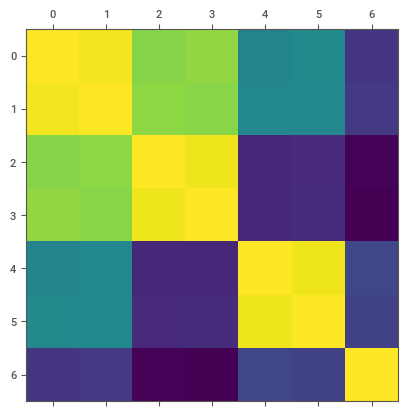

In [25]:
plt.matshow(correlation_matrix)
plt.show()

<AxesSubplot:>

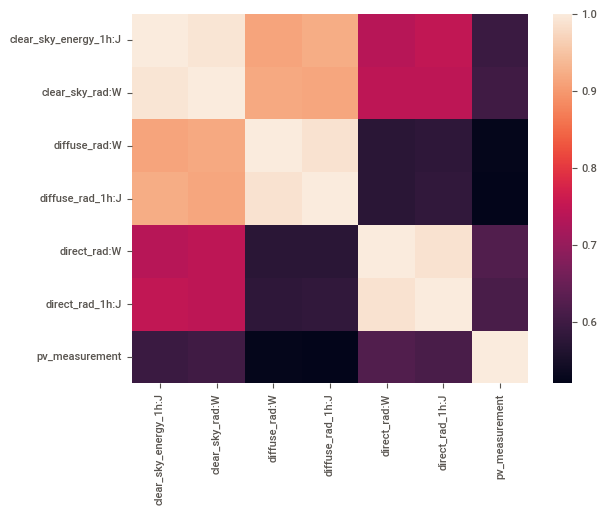

In [26]:
import seaborn as sns
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)